In [2]:
%matplotlib inline
#%matplotlib widget

In [3]:
#############imports######################################################################
import cv2 as cv2
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import trackpy as tp
import scipy as sc
import matplotlib.colors as colors
import os
from ipywidgets import HBox, Textarea, interact

In [4]:
def read_time(time_value):
    fps=25
    sign_index=time_value.index(':')
    minutes=int(time_value[0:sign_index])
    sec=int(time_value[sign_index+1:len(time_value)])
    frames=(minutes*60+sec)*25
    return frames
#def expShift(t,A,tau,k):
#    return A*np.exp(-t/tau)+k
def expShift(t,A,tau,k):
    return A*np.exp(-(t**2)/((tau**2)))+k
#def CovToCorr(cov_data):
#    shape=cov_data.shape
#    result=[]
#    for i in range(0,shape):
def powerlaw(x,A,n):
    return A*x**n
def linear_fit_log(x,n,A):
    return n*x+A

In [87]:
expSumFileNamePassive='C:\\Users\\User\\Documents\\Eden\\locate_git_code\\packaged\\expSumPack_botnum_28cm_updated.csv'
expSumPassive=pd.read_csv(expSumFileNamePassive,index_col=0)
all_linked_data_filename='C:\\Users\\User\\Documents\\Eden\\locate_git_code\\packaged\\all_linking_passive_data_28cm.csv'
all_linked_data=pd.read_csv(all_linked_data_filename,index_col=0)
passive_path='C:\\Users\\User\\Documents\\Eden\\locate_git_code\\packaged'
delta_t=30 #seconds
velocity_data=pd.DataFrame()
for index,row in expSumPassive.iterrows():
    original_starting_time=read_time(row.start_min)
    original_ending_time=read_time(row.end_min)
    starting_time=original_starting_time+20*25#seconds
    ending_time=original_starting_time+600*25#sec
    if original_ending_time<ending_time:
        ending_time=original_ending_time
    FileName=row.linkingFileNamePack
    print(FileName)
    #data=all_linked_data[(all_linked_data['Filename']==FileName)]
    data=pd.read_csv(passive_path+'\\'+FileName,index_col=0)
    data=data.iloc[starting_time:ending_time,0:4]
    first_line=data.iloc[0,:]
    #raw_diff=data-first_line
    raw_diff=data.diff(periods=delta_t*25)
    #delta_r=np.sqrt(np.power(raw_diff.x,2)+np.power(raw_diff.y,2))
    #v_of_center=delta_r/time
    #raw_diff=data.diff(periods=25*delta_t)
    delta_r=np.sqrt(np.power(raw_diff.x,2)+np.power(raw_diff.y,2))
    delta_t_array=[delta_t]*len(delta_r)
    mean_V= delta_r/delta_t_array
    #print(mean_V)
    #mean_displacment=mean_V.mean(axis=0,numeric_only=True,skipna=True)
    mean_displacment=delta_r.mean(axis=0,numeric_only=True,skipna=True)
    mean_V= mean_displacment/delta_t
    mean_Vx=raw_diff.x.mean(axis=0,numeric_only=True,skipna=True)/delta_t
    #mean_Vx=raw_diff.x.mean(axis=0,numeric_only=True,skipna=True)/delta_t
    mean_Vy=raw_diff.y.mean(axis=0,numeric_only=True,skipna=True)/delta_t
    row_data=pd.DataFrame()
    row_data['FileName']=[FileName]
    row_data['Bot_Type']=[row.bottype]
    row_data['bots No.']=row.bots
    row_data['mean_Vx(per_1sec)']=[mean_Vx]
    row_data['mean_Vy(per_1sec)']=[mean_Vy]
    row_data['mean_Vr(per_1sec)']=[mean_V]
    velocity_data=pd.concat([velocity_data,row_data],axis=0,ignore_index=True)
print(velocity_data)
velocity_data.to_csv(passive_path+'\\mean_velocity(per_1sec)_diameter_28cm.csv')

fronter_N001_D028_C0556.MP4_link.csv
fronter_N001_D028_C0555.MP4_link.csv
updated_test_fronter_N001_D028_C0554.MP4_link.csv
updated_test_fronter_N001_D028_C0553.MP4_link.csv
aligner_N001_D028_C0575.MP4_link.csv
aligner_N001_D028_C0574.MP4_link.csv
aligner_N001_D028_C0573.MP4_link.csv
aligner_N001_D028_C0572.MP4_link.csv
fronter_N004_D028_C0560.MP4_link.csv
fronter_N004_D028_C0559.MP4_link.csv
fronter_N004_D028_C0558.MP4_link.csv
fronter_N004_D028_C0557.MP4_link.csv
aligner_N004_D028_C0580.MP4_link.csv
aligner_N004_D028_C0579.MP4_link.csv
aligner_N004_D028_C0578.MP4_link.csv
aligner_N004_D028_C0577.MP4_link.csv
aligner_N004_D028_C0576.MP4_link.csv
fronter_N008_D028_C0567.MP4_link.csv
fronter_N008_D028_C0566.MP4_link.csv
fronter_N008_D028_C0565.MP4_link.csv
fronter_N008_D028_C0563.MP4_link.csv
fronter_N008_D028_C0562.MP4_link.csv
aligner_N008_D028_C0587.MP4_link.csv
aligner_N008_D028_C0586.MP4_link.csv
aligner_N008_D028_C0585.MP4_link.csv
aligner_N008_D028_C0584.MP4_link.csv
aligner_N008

In [88]:
mean_data=velocity_data.groupby(by=["Bot_Type","bots No."]).mean()
print(mean_data)
std_data=velocity_data.groupby(by=["Bot_Type","bots No."]).std()
count_data=velocity_data.groupby(by=["Bot_Type","bots No."]).count()
print(count_data)

                   mean_Vx(per_1sec)  mean_Vy(per_1sec)  mean_Vr(per_1sec)
Bot_Type bots No.                                                         
aligner  1                 -0.107348          -0.078842           0.256123
         4                  0.006214          -0.078868           0.305471
         8                  0.292178           0.057940           0.590138
         16                -0.132591          -0.088985           0.668532
         21                -0.066443          -0.083244           0.739416
         53                 0.033929          -0.364791           0.765164
fronter  1                 -0.062538           0.023377           0.272978
         4                 -0.024434           0.130648           0.954180
         8                  0.005496           0.147902           0.854349
         16                -0.062413          -0.011302           1.214182
         21                 1.022482           0.946362           1.977717
         53              

C:\Users\User\AppData\Local\Temp\ipykernel_11028\2739216288.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mean_data=velocity_data.groupby(by=["Bot_Type","bots No."]).mean()
C:\Users\User\AppData\Local\Temp\ipykernel_11028\2739216288.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.std is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  std_data=velocity_data.groupby(by=["Bot_Type","bots No."]).std()


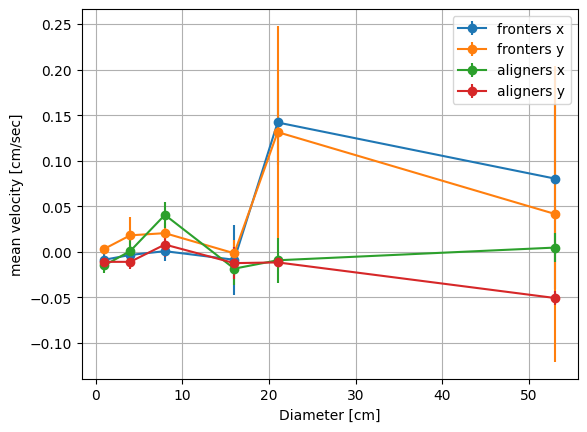

In [89]:
arenaSizePixels = 1080 # [pixels]
arenaSizeCm = 150 # [cm]
mpp = arenaSizeCm/arenaSizePixels
fronter_datax=mean_data.loc[("fronter","mean_Vx(per_1sec)")]
aligner_datax=mean_data.loc[("aligner","mean_Vx(per_1sec)")]

fronter_countx=count_data.loc[("fronter","mean_Vx(per_1sec)")]
aligner_countsx=count_data.loc[("aligner","mean_Vx(per_1sec)")]

fronter_errx=std_data.loc[("fronter","mean_Vx(per_1sec)")]/np.sqrt(fronter_countx)
aligner_errx=std_data.loc[("aligner","mean_Vx(per_1sec)")]/np.sqrt(aligner_countsx)

fronter_datay=mean_data.loc[("fronter","mean_Vy(per_1sec)")]
fronter_county=count_data.loc[("fronter","mean_Vy(per_1sec)")]
fronter_erry=std_data.loc[("fronter","mean_Vy(per_1sec)")]/np.sqrt(fronter_county)

aligner_datay=mean_data.loc[("aligner","mean_Vy(per_1sec)")]
aligner_county=count_data.loc[("aligner","mean_Vy(per_1sec)")]
aligner_erry=std_data.loc[("aligner","mean_Vy(per_1sec)")]/np.sqrt(aligner_county)
fig,ax = plt.subplots()
ax.errorbar(x=fronter_datax.index,y=fronter_datax*mpp,marker='o',label='fronters x',yerr=fronter_errx*mpp)
ax.errorbar(x=fronter_datay.index,y=fronter_datay*mpp,marker='o',label='fronters y',yerr=fronter_erry*mpp)
#ax.plot(fronter_data_max.index,fronter_data_max,'-o',label='fronter_n_max')
ax.errorbar(x=aligner_datax.index,y=aligner_datax*mpp,marker='o',label='aligners x',yerr=aligner_errx*mpp)
ax.errorbar(x=aligner_datay.index,y=aligner_datay*mpp,marker='o',label='aligners y',yerr=aligner_erry*mpp)
#ax.plot(aligner_data_max.index,aligner_data_max,'-o',label='aligners_n_max')
ax.set_xlabel('Diameter [cm]')
ax.set_ylabel('mean velocity [cm/sec]')
ax.grid()
ax.legend()

bots No.
1     0.020991
4     0.044136
8     0.030259
16    0.054237
21    0.100291
53    0.108269
Name: mean_Vr(per_1sec), dtype: float64
bots No.
1     0.009452
4     0.013227
8     0.013517
16    0.013150
21    0.011641
53    0.016134
Name: mean_Vr(per_1sec), dtype: float64


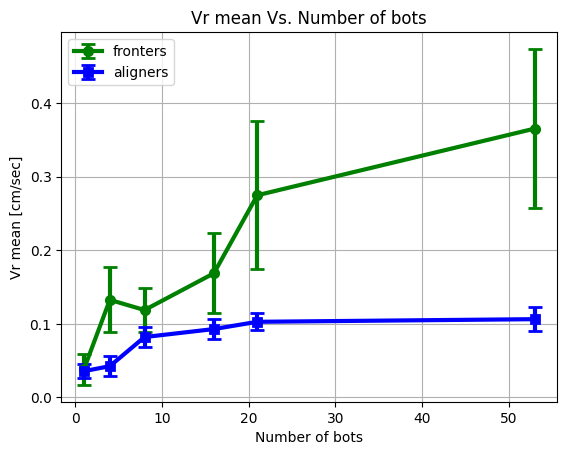

In [92]:
arenaSizePixels = 1080 # [pixels]
arenaSizeCm = 150 # [cm]
mpp = arenaSizeCm/arenaSizePixels#/2
fronter_data=mean_data.loc[("fronter","mean_Vr(per_1sec)")]*mpp
aligner_data=mean_data.loc[("aligner","mean_Vr(per_1sec)")]*mpp
fronter_countsr=count_data.loc[("fronter","mean_Vr(per_1sec)")]
aligner_countsr=count_data.loc[("aligner","mean_Vr(per_1sec)")]

fronter_err=std_data.loc[("fronter","mean_Vr(per_1sec)")]/(np.sqrt(fronter_countsr))*mpp
print(fronter_err)
aligner_err=std_data.loc[("aligner","mean_Vr(per_1sec)")]/(np.sqrt(aligner_countsr))*mpp
print(aligner_err)
fig,ax = plt.subplots()
ax.errorbar(x=fronter_data.index,y=fronter_data,label='fronters',yerr=fronter_err,marker='o',capsize=5,color='green'
             ,markeredgewidth=2,elinewidth=3,linewidth=3)
ax.errorbar(x=aligner_data.index,y=aligner_data,label='aligners',yerr=aligner_err,marker='s',capsize=5,color='blue'
             ,markeredgewidth=2,elinewidth=3,linewidth=3)
ax.grid()
ax.legend()
ax.set_title('Vr mean Vs. Number of bots')
ax.set_xlabel('Number of bots')
ax.set_ylabel('Vr mean [cm/sec]')
saved_data=pd.DataFrame(data={'fronter_data':fronter_data,'fronter_err':fronter_err
                              ,'aligner_data':aligner_data,'aligner_err':aligner_err})
saved_data.to_csv('C:\\Users\\User\\Documents\\Eden\\locate_git_code\\production\\mean_Vr_vs_botnum_28cmdiameter.csv')
fig.savefig('C:\\Users\\User\\Documents\\Eden\\locate_git_code\\production\\mean_Vr_vs_botnum_28cmdiameter.png',bbox_inches='tight')

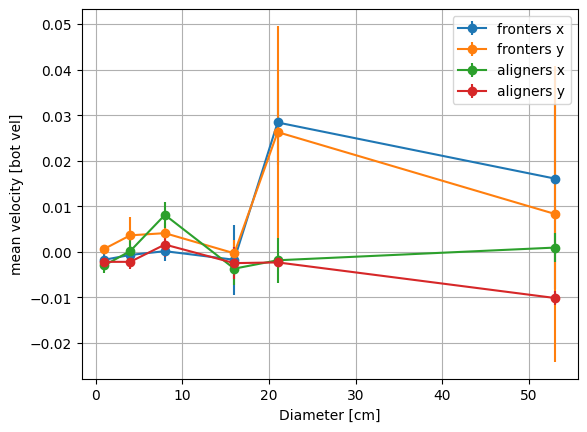

In [93]:
arenaSizePixels = 1080 # [pixels]
arenaSizeCm = 150 # [cm]
mpp = arenaSizeCm/arenaSizePixels
fronter_datax=mean_data.loc[("fronter","mean_Vx(per_1sec)")]
aligner_datax=mean_data.loc[("aligner","mean_Vx(per_1sec)")]
fronter_errx=std_data.loc[("fronter","mean_Vx(per_1sec)")]/np.sqrt(fronter_countx)
aligner_errx=std_data.loc[("aligner","mean_Vx(per_1sec)")]/np.sqrt(aligner_countsx)
fronter_datay=mean_data.loc[("fronter","mean_Vy(per_1sec)")]
fronter_erry=std_data.loc[("fronter","mean_Vy(per_1sec)")]/np.sqrt(fronter_county)
aligner_datay=mean_data.loc[("aligner","mean_Vy(per_1sec)")]
aligner_erry=std_data.loc[("aligner","mean_Vy(per_1sec)")]/np.sqrt(aligner_county)
fig,ax = plt.subplots()
ax.errorbar(x=fronter_data.index,y=fronter_datax*mpp/5,marker='o',label='fronters x',yerr=fronter_errx*mpp/5)
ax.errorbar(x=fronter_data.index,y=fronter_datay*mpp/5,marker='o',label='fronters y',yerr=fronter_erry*mpp/5)
#ax.plot(fronter_data_max.index,fronter_data_max,'-o',label='fronter_n_max')
ax.errorbar(x=aligner_data.index,y=aligner_datax*mpp/5,marker='o',label='aligners x',yerr=aligner_errx*mpp/5)
ax.errorbar(x=aligner_data.index,y=aligner_datay*mpp/5,marker='o',label='aligners y',yerr=aligner_erry*mpp/5)
#ax.plot(aligner_data_max.index,aligner_data_max,'-o',label='aligners_n_max')
ax.set_xlabel('Diameter [cm]')
ax.set_ylabel('mean velocity [bot vel]')
ax.grid()
ax.legend()